**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import data

In [2]:
### set file path
fdiry = file.path(FD_RES, "source", "cCREs")
fname = "ENCFF971AHO_ENCFF847JMY_ENCFF779QTH_ENCFF405AYC.7group.bed"
fpath = file.path(fdiry, fname)

### import data
cnames = c("Chrom", "Start", "End", "Name", "Score", "Strand", "Value1", "Value2", "Value3", "Label1", "Label2")
dat_ccre = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat_ccre = dat_ccre %>% 
    dplyr::select(Chrom, Start, End, Name, Label1) %>% 
    dplyr::rename(Label = Label1) %>% 
    distinct

### show table
print(dim(dat_ccre))
head(dat_ccre)

[1] 926535      5


Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,181251,181601,EH38E1310153,DNase-only
chr1,190865,191071,EH38E1310154,Low-DNase
chr1,778562,778912,EH38E1310158,"PLS,CTCF-bound"
chr1,779086,779355,EH38E1310159,PLS
chr1,779727,780060,EH38E1310160,Low-DNase
chr1,790397,790626,EH38E1310162,Low-DNase


In [3]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.FADS.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_astarr_myc = dat
print(dim(dat))
head(dat)

[1] 333693      7


Chrom,Start,End,Strand,Region,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chr11,61787220,61787221,stranded_neg,FADS,0,0
chr11,61787220,61787221,stranded_pos,FADS,0,0
chr11,61787220,61787221,unstranded,FADS,0,0
chr11,61787221,61787222,stranded_neg,FADS,0,0
chr11,61787221,61787222,stranded_pos,FADS,0,0
chr11,61787221,61787222,unstranded,FADS,0,0


In [4]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20200905_Ratio.FADS.stranded_pos.perbase.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_tmpra_myc = dat
print(dim(dat))
head(dat)

[1] 111018      6


Chrom,Start,End,Input,Output,FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11,61787329,61787330,539,297,0.5510204
chr11,61787330,61787331,539,297,0.5510204
chr11,61787331,61787332,539,297,0.5510204
chr11,61787332,61787333,539,297,0.5510204
chr11,61787333,61787334,539,297,0.5510204
chr11,61787334,61787335,574,326,0.5679443


## visualize ASTARR

In [5]:
start  = 61790000
end    = 61890000

dat = dat_astarr_myc
dat = dat %>%
    dplyr::filter(Start >= start, End < end) %>%
    dplyr::filter(Strand == "unstranded")

### assign
dat_cov_astarr = dat
print(dim(dat))
head(dat)

[1] 99999     7


Chrom,Start,End,Strand,Region,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chr11,61790000,61790001,unstranded,FADS,0.001168518,0.0007532532
chr11,61790001,61790002,unstranded,FADS,0.001158585,0.0007532532
chr11,61790002,61790003,unstranded,FADS,0.001180898,0.0007813728
chr11,61790003,61790004,unstranded,FADS,0.001189502,0.0007832475
chr11,61790004,61790005,unstranded,FADS,0.001189502,0.0007832475
chr11,61790005,61790006,unstranded,FADS,0.001189502,0.0007832475


In [6]:
dat_cov_astarr %>% dplyr::filter(Input != 0) %>% dim

[1] 99999     7

In [7]:
dat_cov_astarr %>% dplyr::filter(Output != 0) %>% dim

[1] 99935     7

In [8]:
dat = dat_cov_astarr
dat = dat %>% 
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0) %>% 
    mutate(
        FC     = Output / Input,
        Log2FC = log2(Output / Input),
        pLog2FC_add01 = log2((Output+ 1)  / (Input+ 1)),
        pLog2FC_add10 = log2((Output+10)  / (Input+10)),
        
        pLog2FC_10neg1 = log2((Output+10^-1)   / (Input+10^-1)),
        pLog2FC_10neg2 = log2((Output+10^-2)   / (Input+10^-2)),
        pLog2FC_10neg3 = log2((Output+10^-3)   / (Input+10^-3)),
        pLog2FC_10neg4 = log2((Output+10^-4)   / (Input+10^-4)),
        pLog2FC_10neg5 = log2((Output+10^-5)   / (Input+10^-5))
    )

###
dat$FC_Z = (dat$FC - mean(dat$FC)) / sd(dat$FC)

### assign
dat_lfc_astarr = dat
print(dim(dat))
head(dat)

[1] 99935    17


Chrom,Start,End,Strand,Region,Input,Output,FC,Log2FC,pLog2FC_add01,pLog2FC_add10,pLog2FC_10neg1,pLog2FC_10neg2,pLog2FC_10neg3,pLog2FC_10neg4,pLog2FC_10neg5,FC_Z
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11,61790000,61790001,unstranded,FADS,0.001168518,0.0007532532,0.6446229,-0.6334726,-0.0005985248,-5.990423e-05,-0.005933989,-0.05466452,-0.3066748,-0.5720977,-0.6267396,-0.2606242
chr11,61790001,61790002,unstranded,FADS,0.001158585,0.0007532532,0.6501494,-0.6211568,-0.0005842114,-5.847140e-05,-0.005792337,-0.05338088,-0.3000514,-0.5607566,-0.6145287,-0.2495914
chr11,61790002,61790003,unstranded,FADS,0.001180898,0.0007813728,0.6616766,-0.5958018,-0.0005758286,-5.763370e-05,-0.005707940,-0.05249522,-0.2919331,-0.5393317,-0.5896209,-0.2265791
chr11,61790003,61790004,unstranded,FADS,0.001189502,0.0007832475,0.6584666,-0.6028179,-0.0005855242,-5.860439e-05,-0.005803778,-0.05335414,-0.2960960,-0.5459247,-0.5965929,-0.2329874
chr11,61790004,61790005,unstranded,FADS,0.001189502,0.0007832475,0.6584666,-0.6028179,-0.0005855242,-5.860439e-05,-0.005803778,-0.05335414,-0.2960960,-0.5459247,-0.5965929,-0.2329874
chr11,61790005,61790006,unstranded,FADS,0.001189502,0.0007832475,0.6584666,-0.6028179,-0.0005855242,-5.860439e-05,-0.005803778,-0.05335414,-0.2960960,-0.5459247,-0.5965929,-0.2329874


In [9]:
mycolors = c(
    "#8dd3c7", #01
    #"#ffffb3", #02
    "#bebada", #03
    "#fb8072", #04
    "#80b1d3", #05
    "#fdb462", #06
    "#b3de69", #07
    "#fccde5", #08
    "#d9d9d9", #09
    "#bc80bd", #10
    "#ccebc5", #11
    "#ffed6f", #12
    "#1f78b4",
    "#b2df8a",
    "#33a02c",
    "#fb9a99",
    "#e31a1c",
    "#ff7f00",
    "#cab2d6",
    "#6a3d9a",
    "#b15928")

In [10]:
### get ccre at around GATA1 gene
dat_ann = dat_ccre %>% dplyr::filter(Chrom == "chr8", Start >= start, End < end)

### add color
#dat_ann$Color = tol21rainbow
dat_ann$Color = mycolors

### show table
print(dim(dat_ann))
head(dat_ann)

[1] 20  6


Chrom,Start,End,Name,Label,Color
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr8,61791011,61791250,EH38E2635397,Low-DNase,#8dd3c7
chr8,61792065,61792411,EH38E2635398,Low-DNase,#bebada
chr8,61805541,61805891,EH38E2635402,Low-DNase,#fb8072
chr8,61810048,61810312,EH38E2635405,Low-DNase,#80b1d3
chr8,61821467,61821668,EH38E2635409,Low-DNase,#fdb462
chr8,61823524,61823870,EH38E2635412,Low-DNase,#b3de69


In [11]:
dat_cov = dat_cov_astarr
dat_lfc = dat_lfc_astarr
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=pLog2FC_add01))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.7) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="ATAC-STARR Chr11:61,790,000-61,890,000")
lst[[5]] = lst[[5]] + labs(y = "PseudoLog2FC\n(pcount=1.0)")

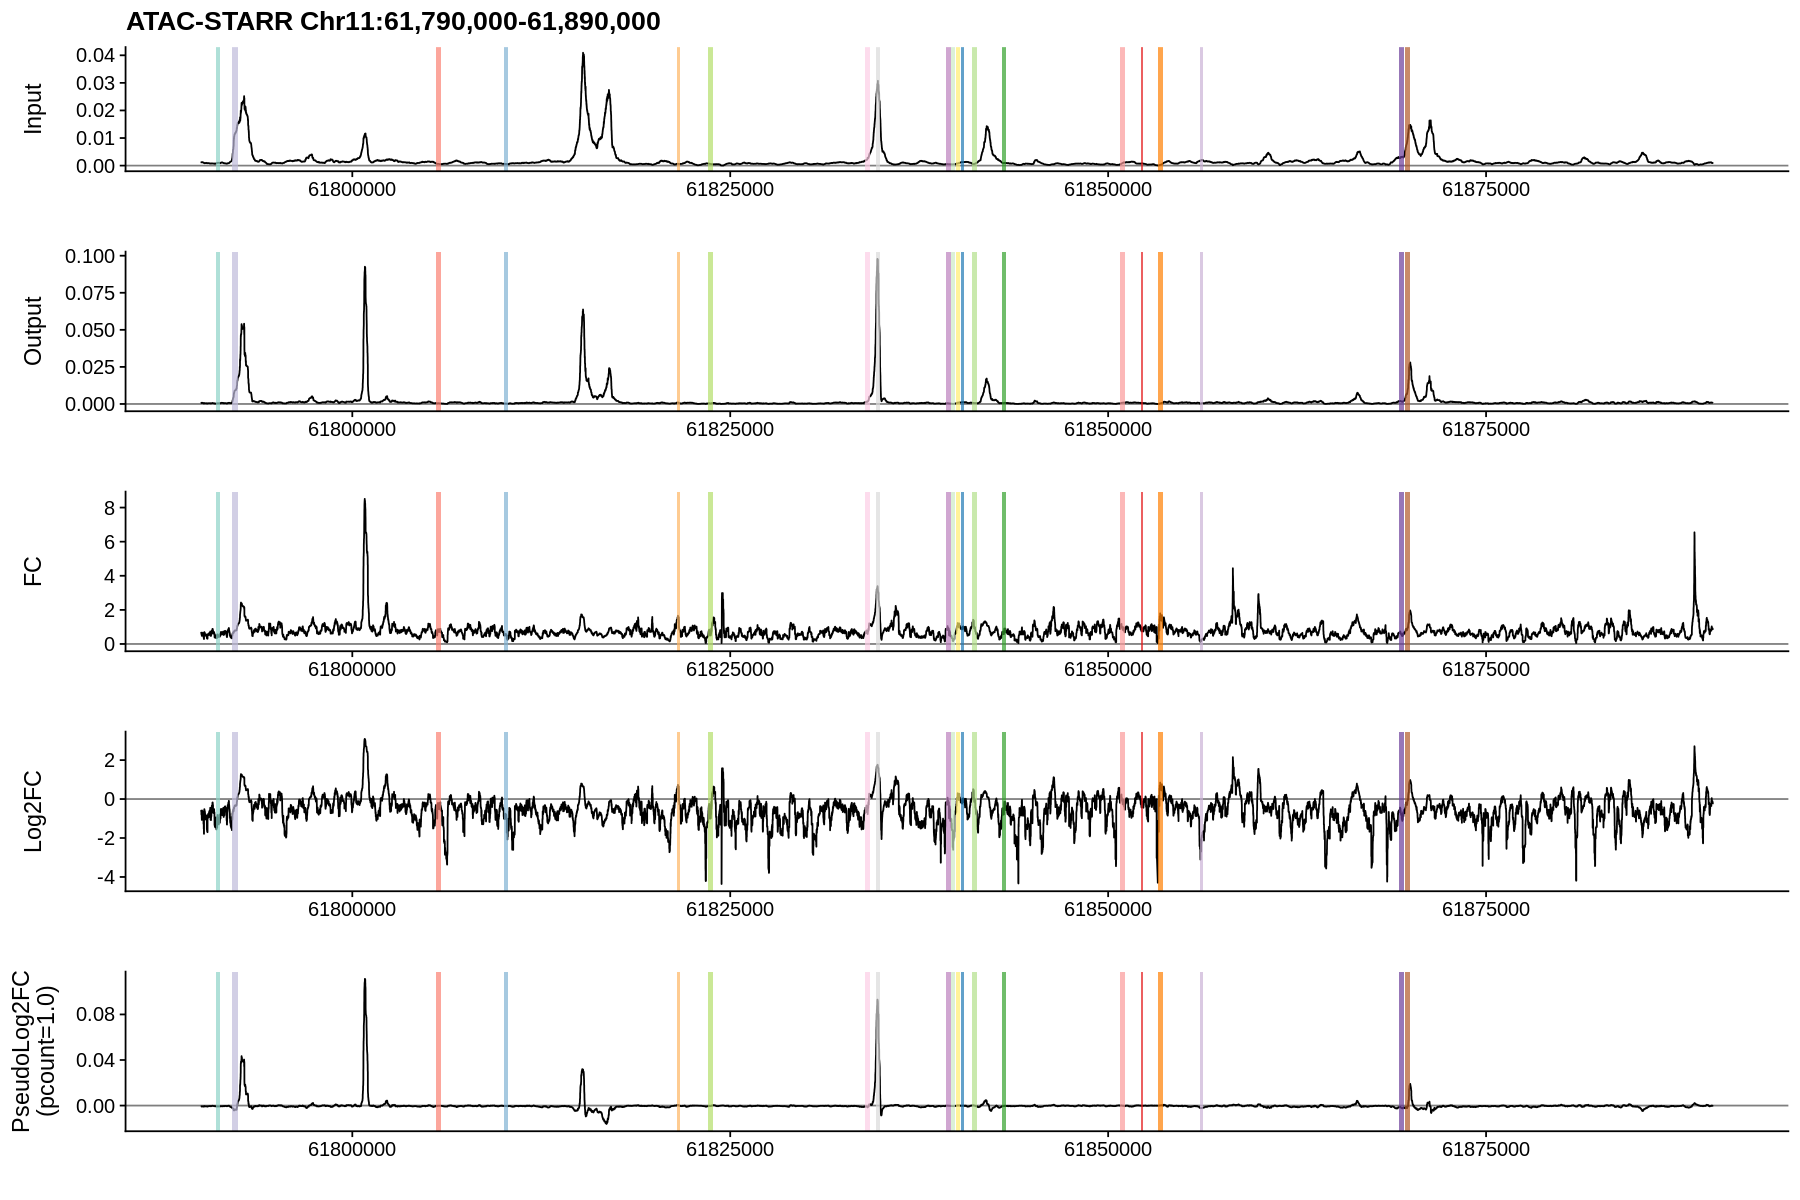

In [12]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [13]:
dat_cov = dat_cov_astarr
dat_lfc = dat_lfc_astarr
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC_Z))

lst = list(gp1, gp2, gp3, gp4)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.7) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

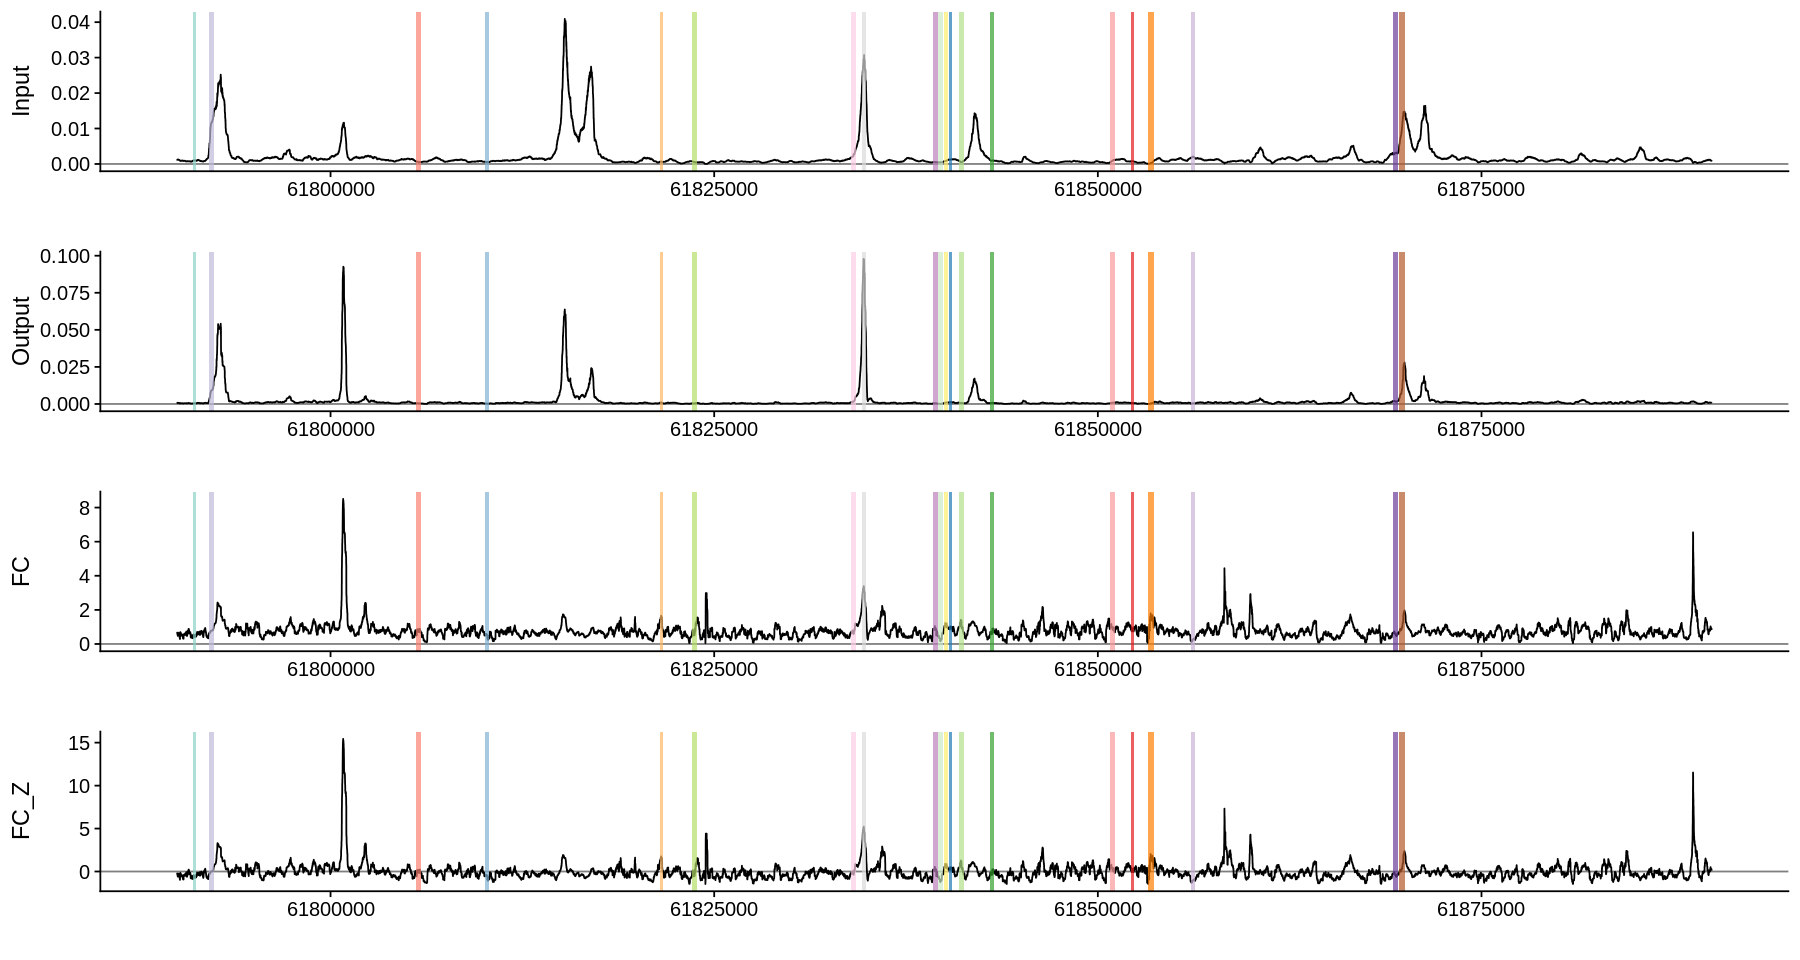

In [14]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [15]:
dat_lfc = dat_lfc_astarr
gp1 = ggplot(dat_lfc, aes(x=Start, y=Log2FC))
gp2 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg5))
gp3 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg4))
gp4 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg3))
gp5 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg2))
gp6 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg1))
gp7 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_add01))
gp8 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_add10))

lst = list(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        theme_cowplot()
    return(gpt)
})

txt = "pLog2FC = log2( (Output + cnt) / (Input + cnt) )"
lst[[1]] = lst[[1]] + labs(x="", y="", title="Log2FC")
lst[[2]] = lst[[2]] + labs(x="", y="", title="pseudoLog2FC (10^-5)")
lst[[3]] = lst[[3]] + labs(x="", y="", title="pseudoLog2FC (10^-4)")
lst[[4]] = lst[[4]] + labs(x="", y="", title="pseudoLog2FC (10^-3)")
lst[[5]] = lst[[5]] + labs(x="", y="", title="pseudoLog2FC (10^-2)")
lst[[6]] = lst[[6]] + labs(x="", y="", title="pseudoLog2FC (10^-1)")
lst[[7]] = lst[[7]] + labs(x="", y="", title="pseudoLog2FC (10^+0 =  1)")
lst[[8]] = lst[[8]] + labs(x="", y="", title="pseudoLog2FC (10^+1 = 10)")

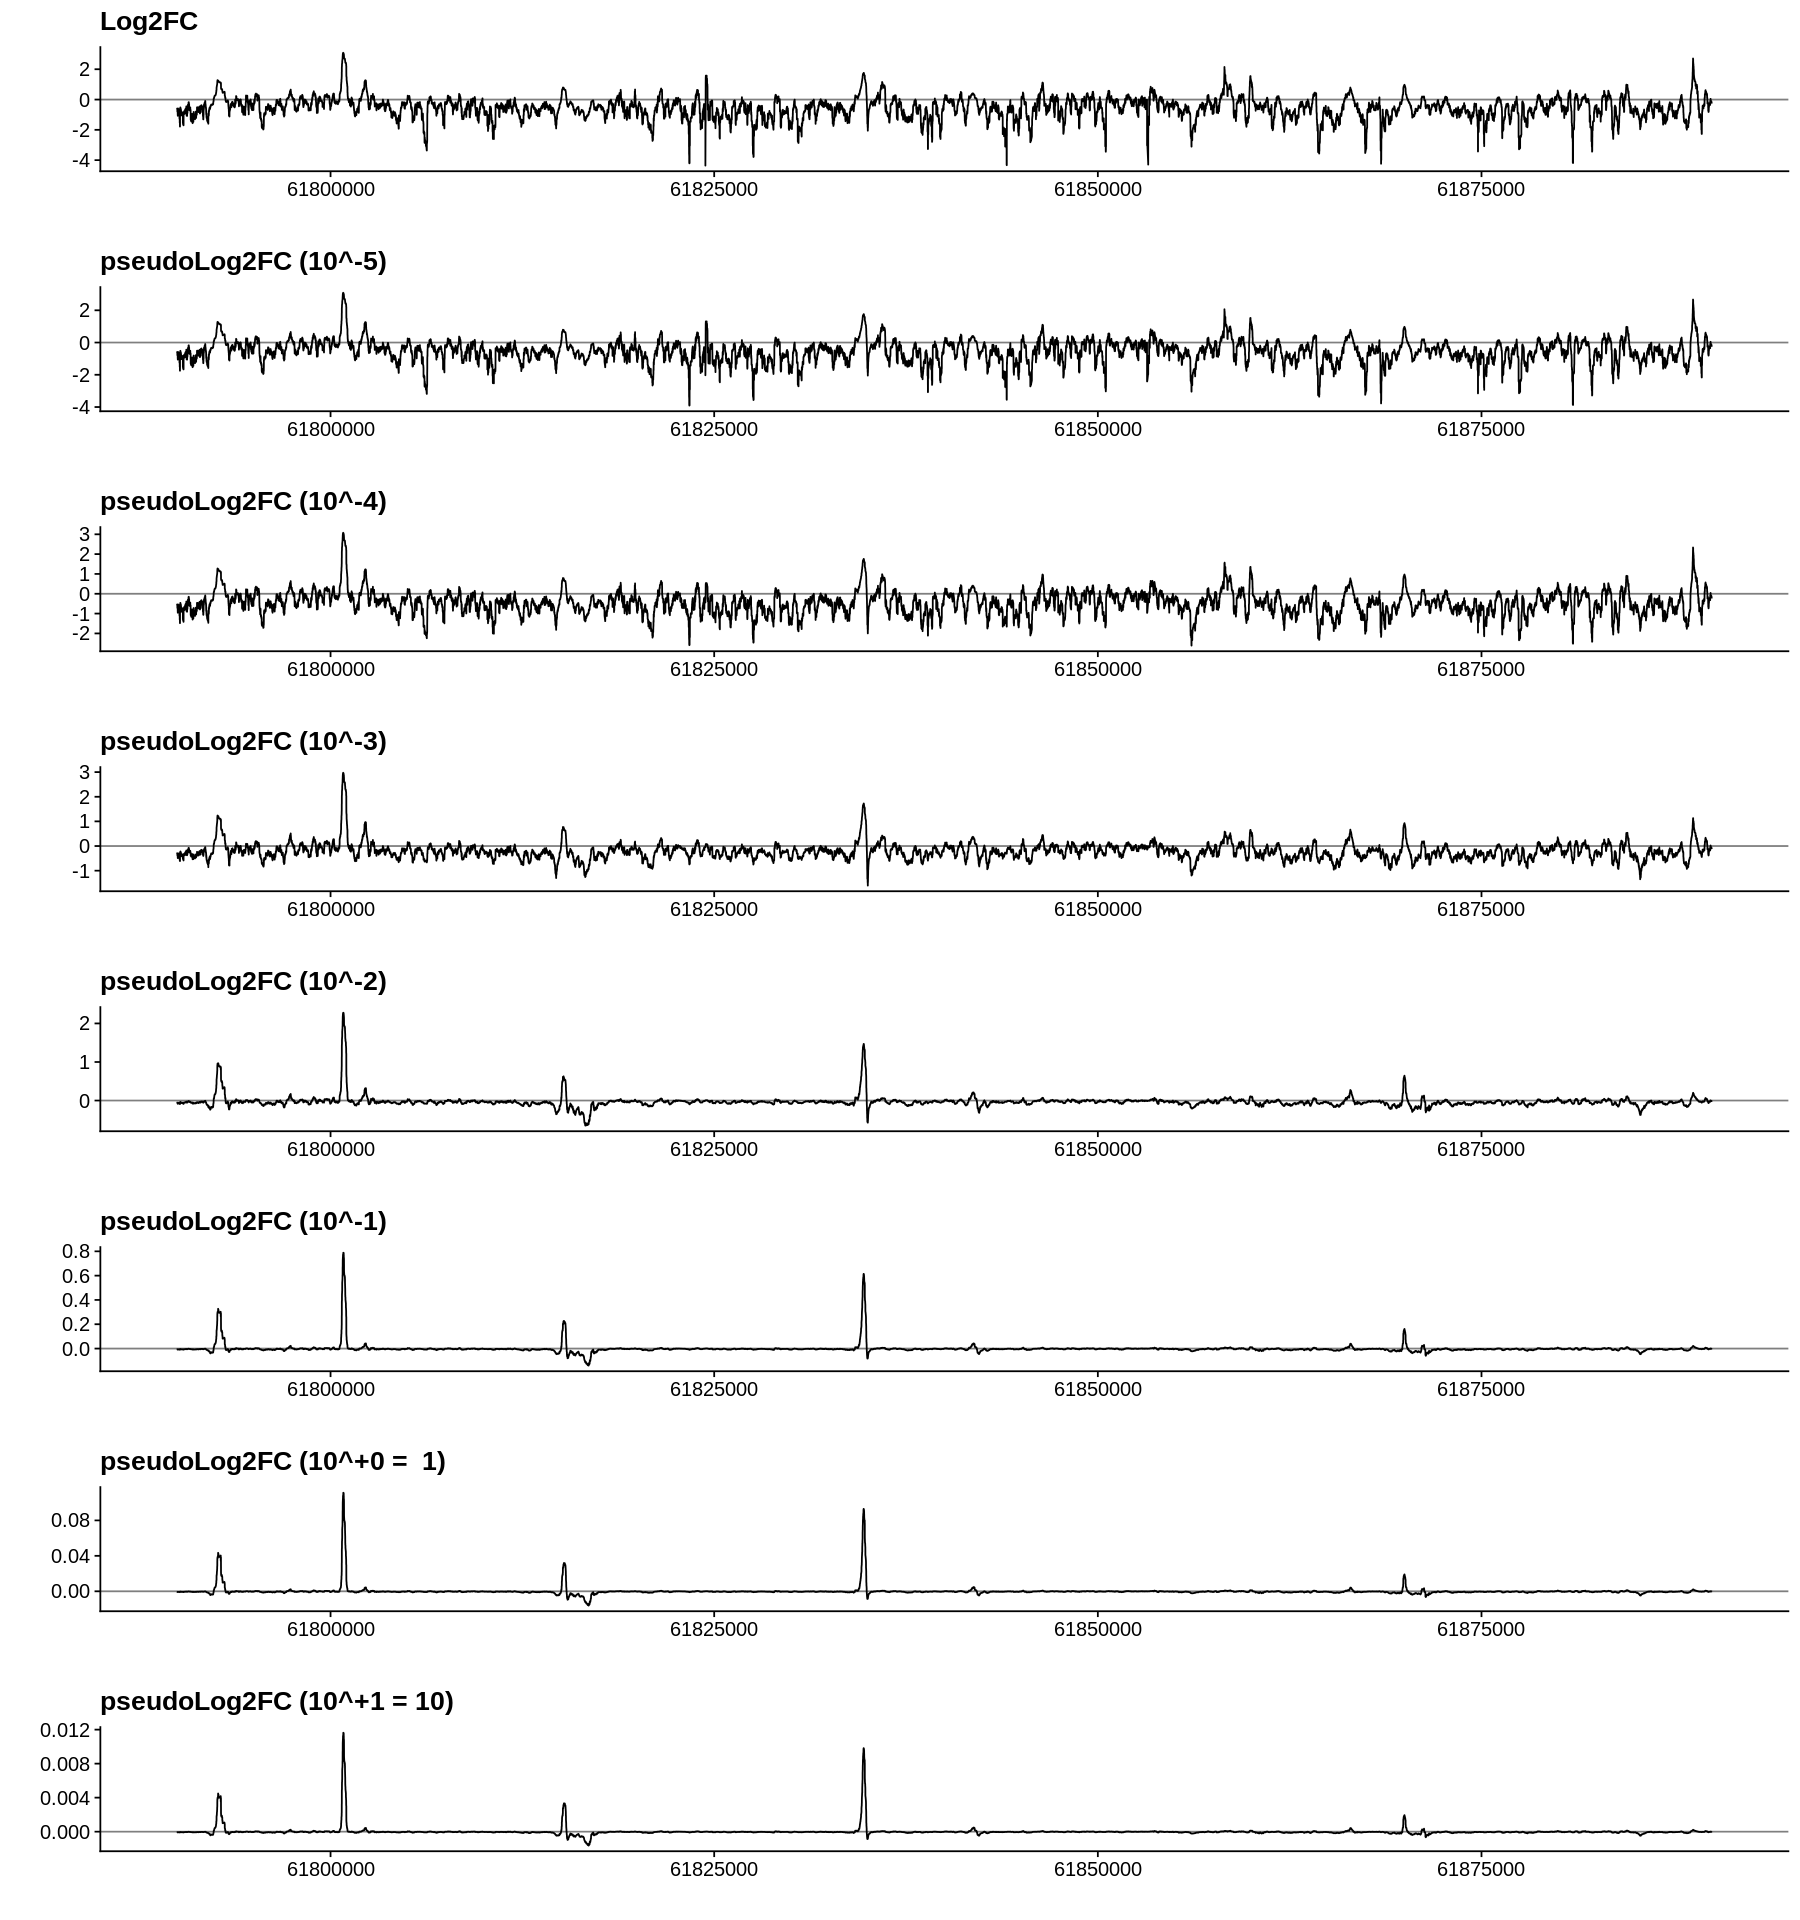

In [16]:
options(repr.plot.height=16, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

## Plot TMPRA

In [17]:
start  = 61790000
end    = 61890000

dat = dat_tmpra_myc
dat = dat %>%
    dplyr::filter(Start >= start, Start <= end) %>%
    mutate(
        Log2FC = log2(FC),
        pLog2FC_1e2 = log2((Output+  10^+2) / (Input+  10^+2)),
        pLog2FC_5e2 = log2((Output+5*10^+2) / (Input+5*10^+2)),
        pLog2FC_1e3 = log2((Output+  10^+3) / (Input+  10^+3)),
        pLog2FC_1e4 = log2((Output+  10^+4) / (Input+  10^+4)),
        pLog2FC_1e5 = log2((Output+  10^+5) / (Input+  10^+5))
    )

###
dat$FC_Z = (dat$FC - mean(dat$FC)) / sd(dat$FC)

### show table
dat_cov_tmpra = dat
print(dim(dat))
head(dat)

[1] 100000     13


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC_1e2,pLog2FC_5e2,pLog2FC_1e3,pLog2FC_1e4,pLog2FC_1e5,FC_Z
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11,61790000,61790001,429,905,2.109557,1.076940,0.9258559,0.5968196,0.4147851,0.06438894,0.006821740,-0.1414485
chr11,61790001,61790002,429,905,2.109557,1.076940,0.9258559,0.5968196,0.4147851,0.06438894,0.006821740,-0.1414485
chr11,61790002,61790003,429,905,2.109557,1.076940,0.9258559,0.5968196,0.4147851,0.06438894,0.006821740,-0.1414485
chr11,61790003,61790004,427,917,2.147541,1.102686,0.9484448,0.6121985,0.4258650,0.06625232,0.007022032,-0.1379510
chr11,61790004,61790005,428,908,2.121495,1.085082,0.9328858,0.6014506,0.4180652,0.06492412,0.006878998,-0.1403492
chr11,61790005,61790006,428,908,2.121495,1.085082,0.9328858,0.6014506,0.4180652,0.06492412,0.006878998,-0.1403492


In [18]:
dat = dat_cov_tmpra
gp1 = ggplot() + geom_line(data=dat, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat, aes(x=Start, y=pLog2FC_1e4))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.7) +
        labs(x="") +
        theme_cowplot() 
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="Tiling MPRA Chr11:61,790,000-61,890,000")
lst[[5]] = lst[[5]] + labs(y = "PseudoLog2FC\n(pcount=10,000)")

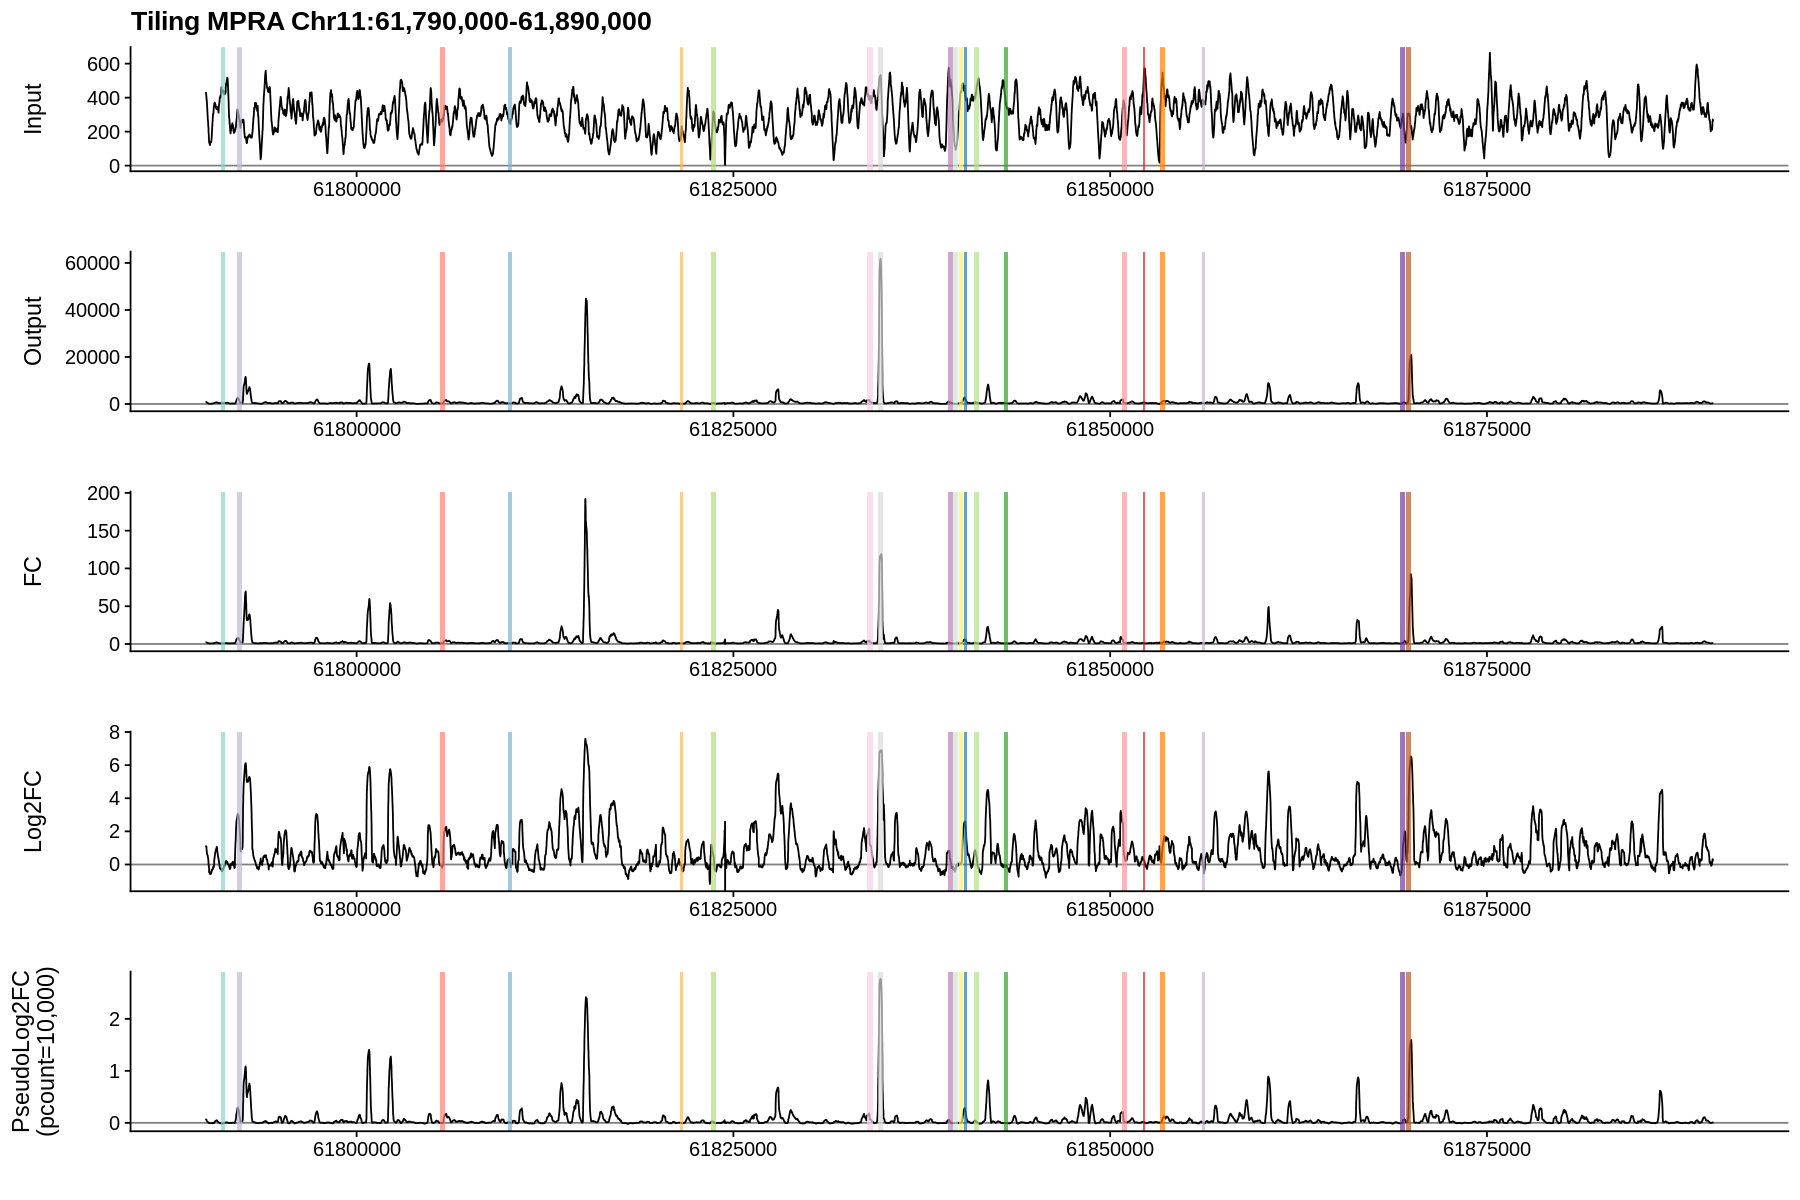

In [19]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [20]:
dat_cov = dat_cov_tmpra
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=FC_Z))

lst = list(gp1, gp2, gp3, gp4)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.7) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

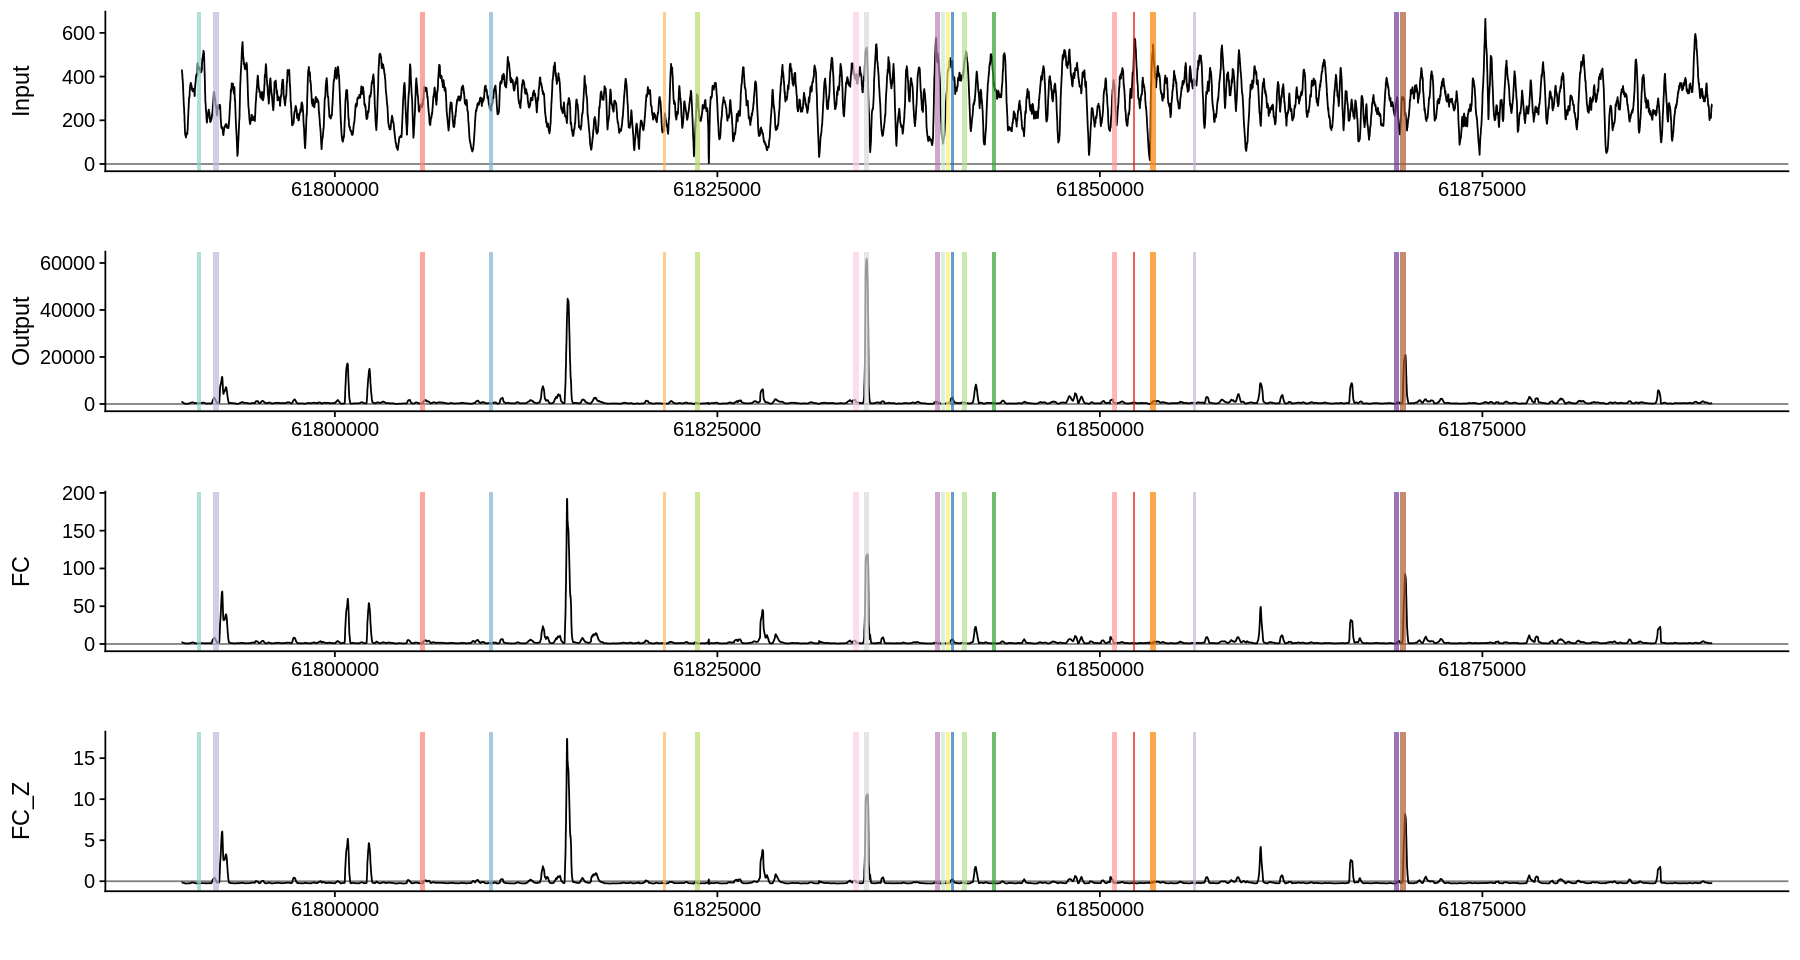

In [21]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [22]:
dat = dat_cov_tmpra
gp1 = ggplot(dat, aes(x=Start, y=Log2FC))
gp2 = ggplot(dat, aes(x=Start, y=pLog2FC_1e2))
gp3 = ggplot(dat, aes(x=Start, y=pLog2FC_5e2))
gp4 = ggplot(dat, aes(x=Start, y=pLog2FC_1e3))
gp5 = ggplot(dat, aes(x=Start, y=pLog2FC_1e4))
gp6 = ggplot(dat, aes(x=Start, y=pLog2FC_1e5))

lst = list(gp1, gp2, gp3, gp4, gp5, gp6)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        theme_cowplot()
    return(gpt)
})

txt = "pLog2FC = log2( (Output + cnt) / (Input + cnt) )"
lst[[1]] = lst[[1]] + labs(x="", y="", title="Log2FC")
lst[[2]] = lst[[2]] + labs(x="", y="", title="pseudoLog2FC:     100")
lst[[3]] = lst[[3]] + labs(x="", y="", title="pseudoLog2FC:     500")
lst[[4]] = lst[[4]] + labs(x="", y="", title="pseudoLog2FC:   1,000")
lst[[5]] = lst[[5]] + labs(x="", y="", title="pseudoLog2FC:  10,000")
lst[[6]] = lst[[6]] + labs(x="", y="", title="pseudoLog2FC: 100,000")

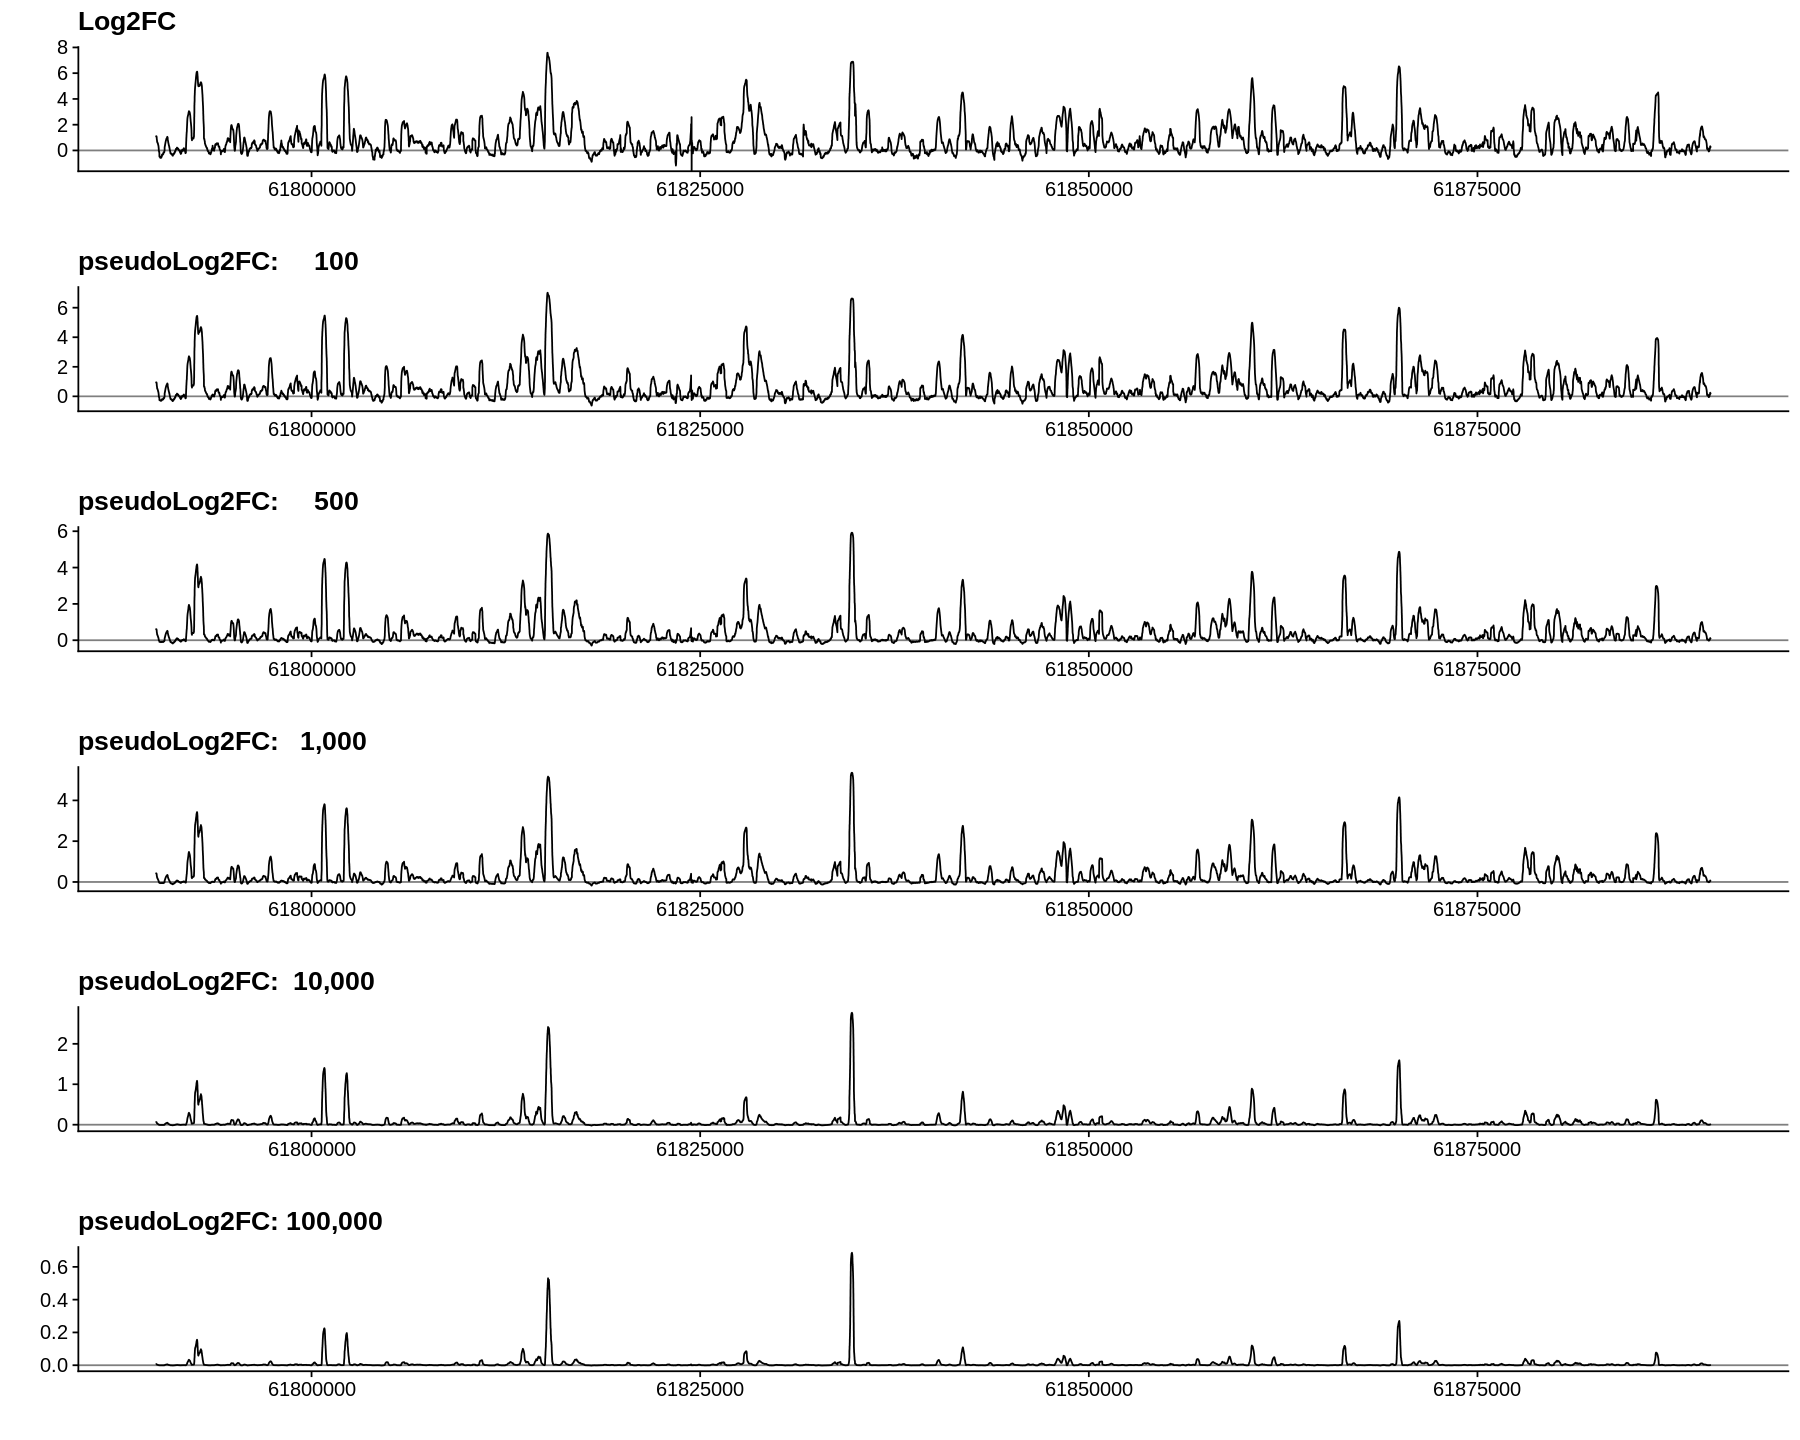

In [23]:
options(repr.plot.height=12, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [24]:
mean(dat$Input)

[1] 290.935